In [1]:
import zipfile 
import pysal as ps
%matplotlib inline
import numpy as np
import ast
import json
import urllib
import urllib2
from cStringIO import StringIO
import pandas as pd
import requests
import os
import geopandas as gpd
import matplotlib.pylab as pl
from fiona.crs import from_epsg
import matplotlib.pylab as pl
from matplotlib import colors
import shapely
import seaborn as sns
import gzip
import mapreduce as mr
import csv

In [54]:
fname = 'Data/CensusTracks.geojson'
tracks = gpd.GeoDataFrame.from_file(fname)
tracks.head()

,Within15min,Within30min,boro_code,boro_ct_2010,boro_name,cdeligibil,ct_2010,ctlabel,geometry,id,ntacode,ntaname,puma,shape_area,shape_leng
0,0,0,5,5000900,Staten Island,I,000900,9,(POLYGON ((-74.07920577013245 40.6434307837456...,0,SI22,West New Brighton-New Brighton-St. George,3903,2497009.69813,7729.01679376
1,0,0,5,5007400,Staten Island,I,007400,74,(POLYGON ((-74.05974734759452 40.5938486115672...,1,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5788237.79601,9902.94847281
2,0,0,1,1009800,Manhattan,I,009800,98,(POLYGON ((-73.96432543478758 40.7563815309909...,2,MN19,Turtle Bay-East Midtown,3808,1906016.35002,5534.19981063
3,0,0,1,1010000,Manhattan,I,010000,100,(POLYGON ((-73.96802436915851 40.7595781400528...,3,MN19,Turtle Bay-East Midtown,3808,1860938.37721,5692.16873705
4,0,0,1,1010200,Manhattan,I,010200,102,(POLYGON ((-73.97124277307127 40.7609364184790...,4,MN17,Midtown-Midtown South,3807,1860992.70485,5687.80243866


In [55]:
def maptracks(row):
    yield (row['w_track'], row['h_track'],int(row['S000']))

def reducehtracks(counts, pair):
    counts[pair[1]] = counts.get(pair[1], 0)+pair[2]
    return counts

with open('Data/True_nyod_JT00thegood_2014.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    output2 = sorted(reduce(reducehtracks, (mr.run(reader,maptracks)), {}).items())
    
output2[:10]

[('1000100', 4489),
 ('1000101', 374),
 ('1000103', 468),
 ('1000104', 4),
 ('1000110', 5),
 ('1000200', 1595),
 ('1000201', 1279),
 ('1000202', 2049),
 ('1000203', 349),
 ('1000300', 1341)]

In [56]:
def maptracks(row):
    yield (row['w_track'], row['h_track'],int(row['S000']))

def reducewtracks(counts, pair):
    counts[pair[0]] = counts.get(pair[0], 0)+pair[2]
    return counts

with open('Data/True_nyod_JT00thegood_2014.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    output3 = sorted(reduce(reducewtracks, (mr.run(reader,maptracks)), {}).items())
    
output3[:10]

[('1000100', 119),
 ('1000201', 334),
 ('1000202', 619),
 ('1000500', 112),
 ('1000600', 2001),
 ('1000700', 43403),
 ('1000800', 2355),
 ('1000900', 43299),
 ('1001001', 75),
 ('1001002', 207)]

In [57]:
tracks['HomeAffected'] = 0
tracks['JobsAffected'] = 0
def affectedHome(track_Count):
    tracks.loc[tracks.boro_ct_2010 == track_Count[0],'HomeAffected'] = track_Count[1]
    return
map(affectedHome,output2)

def affectedWork(track_Count):
    tracks.loc[tracks.boro_ct_2010 == track_Count[0],'JobsAffected'] = track_Count[1]
    return

map(affectedWork,output3)
print 'done'

done


In [58]:
tracks.head()

,Within15min,Within30min,boro_code,boro_ct_2010,boro_name,cdeligibil,ct_2010,ctlabel,geometry,id,ntacode,ntaname,puma,shape_area,shape_leng,HomeAffected,JobsAffected
0,0,0,5,5000900,Staten Island,I,000900,9,(POLYGON ((-74.07920577013245 40.6434307837456...,0,SI22,West New Brighton-New Brighton-St. George,3903,2497009.69813,7729.01679376,204,18
1,0,0,5,5007400,Staten Island,I,007400,74,(POLYGON ((-74.05974734759452 40.5938486115672...,1,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5788237.79601,9902.94847281,416,237
2,0,0,1,1009800,Manhattan,I,009800,98,(POLYGON ((-73.96432543478758 40.7563815309909...,2,MN19,Turtle Bay-East Midtown,3808,1906016.35002,5534.19981063,5563,9017
3,0,0,1,1010000,Manhattan,I,010000,100,(POLYGON ((-73.96802436915851 40.7595781400528...,3,MN19,Turtle Bay-East Midtown,3808,1860938.37721,5692.16873705,2946,28847
4,0,0,1,1010200,Manhattan,I,010200,102,(POLYGON ((-73.97124277307127 40.7609364184790...,4,MN17,Midtown-Midtown South,3807,1860992.70485,5687.80243866,2941,34251


In [60]:
homeaffected = tracks.HomeAffected
homeaffected = ps.Quantiles(homeaffected, k=8)
homeaffected


                  Quantiles                  
 
 Lower              Upper               Count
           x[i] <=  282.000               278
 282.000 < x[i] <=  370.000               266
 370.000 < x[i] <=  451.000               269
 451.000 < x[i] <=  547.000               271
 547.000 < x[i] <=  673.125               270
 673.125 < x[i] <=  833.750               270
 833.750 < x[i] <= 1321.250               271
1321.250 < x[i] <= 7878.000               271

In [61]:
jobaffected = tracks.JobsAffected
jobaffected = ps.Quantiles(jobaffected, k=8)
jobaffected

                    Quantiles                    
 
  Lower                Upper                Count
             x[i] <=     79.000               273
    79.000 < x[i] <=    163.000               273
   163.000 < x[i] <=    245.000               268
   245.000 < x[i] <=    362.000               271
   362.000 < x[i] <=    551.000               270
   551.000 < x[i] <=    905.000               269
   905.000 < x[i] <=   2006.875               271
  2006.875 < x[i] <= 172186.000               271

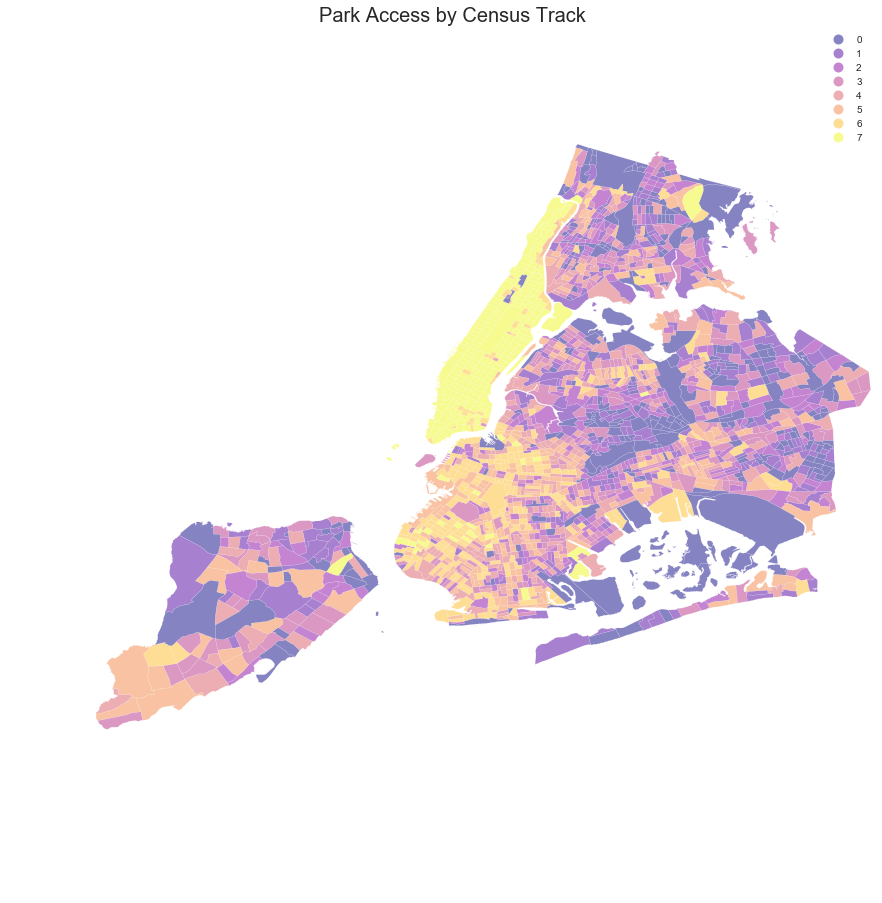

In [62]:
f, ax = pl.subplots(figsize=(15,15))

#parks.plot(c = 'green', linewidth = .5, ax = ax,  colormap = 'Greens', label = 'parks')
tracks.assign(cl = homeaffected.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
                                          ax=ax, cmap='plasma', edgecolor='white', legend=True)

#for i in range(len(facilAsthma)):
#    pl.scatter((getXY(facilAsthma.geometry[i]))[0], (getXY(facilAsthma.geometry[i]))[1], 
#               s = 100, color = 'b', label = 'Facilities')
#pl.xlabel('longitude')
#pl.ylabel('latitude')
pl.axis('off')
#pl.legend()
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("Park Access by Census Track", size=20)

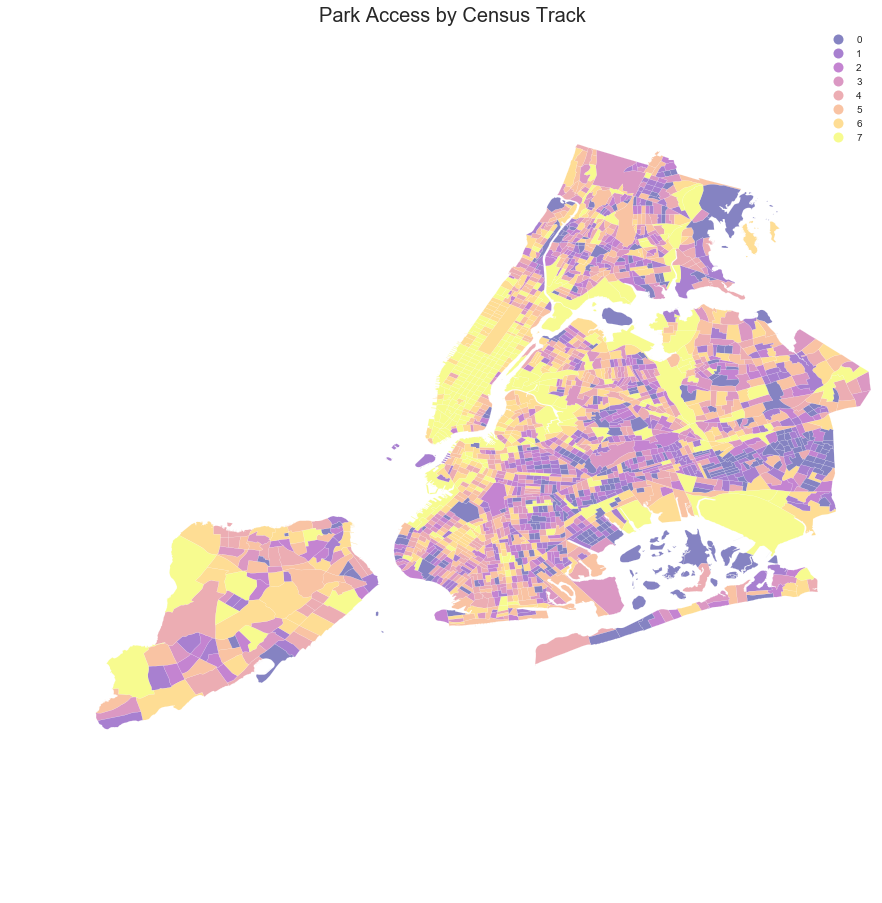

In [63]:
f, ax = pl.subplots(figsize=(15,15))

#parks.plot(c = 'green', linewidth = .5, ax = ax,  colormap = 'Greens', label = 'parks')
tracks.assign(cl = jobaffected.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
                                          ax=ax, cmap='plasma', edgecolor='white', legend=True)

#for i in range(len(facilAsthma)):
#    pl.scatter((getXY(facilAsthma.geometry[i]))[0], (getXY(facilAsthma.geometry[i]))[1], 
#               s = 100, color = 'b', label = 'Facilities')
#pl.xlabel('longitude')
#pl.ylabel('latitude')
pl.axis('off')
#pl.legend()
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("Park Access by Census Track", size=20)

In [36]:
fname = 'Data/CensusBlocks.geojson'
blocks = gpd.GeoDataFrame.from_file(fname)
blocks.head()

,OnRangeToL,Within15min,Within30min,bctcb_2010,boro_code,boro_name,boro_track,cb_2010,ct_2010,geometry,id,shape_area,shape_leng,track,track_block
0,0,0,0,50009001000,5,Staten Island,5000900,1000,000900,(POLYGON ((-74.07920577013245 40.6434307837456...,0,244589.603884,2508.94811457,0009001000,0009001000
1,0,0,0,50020011000,5,Staten Island,5002001,1000,002001,(POLYGON ((-74.07061992438017 40.6108550670541...,1,111006.286826,1345.88642172,0020011000,0020011000
2,0,0,0,50027001000,5,Staten Island,5002700,1000,002700,(POLYGON ((-74.07524403910642 40.6260063245271...,2,150406.766022,1703.38117241,0027001000,0027001000
3,0,0,0,50040001000,5,Staten Island,5004000,1000,004000,(POLYGON ((-74.08708799689826 40.6111688312392...,3,141296.561149,1511.17374266,0040001000,0040001000
4,0,0,0,50064001000,5,Staten Island,5006400,1000,006400,(POLYGON ((-74.07643744511992 40.6010016065558...,4,200784.983607,1978.24385199,0064001000,0064001000


In [37]:
def mapblocks(row):
    yield (row['w_geocode'], row['h_geocode'],int(row['S000']))

def reducehblocks(counts, pair):
    counts[pair[1]] = counts.get(pair[1], 0)+pair[2]
    return counts

with open('Data/True_nyod_JT00thegood_2014.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    output2 = sorted(reduce(reducehblocks, (mr.run(reader,mapblocks)), {}).items())
    
output2[:10]

[('10001001000', 160),
 ('10001001001', 118),
 ('10001001002', 21),
 ('10001001003', 85),
 ('10001001004', 24),
 ('10001001005', 482),
 ('10001001007', 1),
 ('10001001008', 527),
 ('10001001009', 527),
 ('10001001010', 487)]

In [38]:
def mapblocks(row):
    yield (row['w_geocode'], row['h_geocode'],int(row['S000']))

def reducewblocks(counts, pair):
    counts[pair[0]] = counts.get(pair[0], 0)+pair[2]
    return counts

with open('Data/True_nyod_JT00thegood_2014.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    output3 = sorted(reduce(reducewblocks, (mr.run(reader,mapblocks)), {}).items())
    
output3[:10]

[('10001001001', 119),
 ('10002011000', 67),
 ('10002011001', 13),
 ('10002012000', 57),
 ('10002012001', 156),
 ('10002012002', 41),
 ('10002021000', 64),
 ('10002021001', 36),
 ('10002021002', 309),
 ('10002022000', 24)]

In [40]:
blocks['HomeAffected'] = 0
blocks['JobsAffected'] = 0
blocksnyc = set(blocks.bctcb_2010)
def affectedHome(block_Count):
    #print block_Count
    if block_Count[0] in blocksnyc:
        blocks.loc[blocks.bctcb_2010 == block_Count[0] ,'HomeAffected'] = block_Count[1]
    return
    
map(affectedHome,output2)
#(mr.run(output2,affectedHome))

print 'done'
blocks.loc[blocks.bctcb_2010 == output2[0][0],'HomeAffected']

done


29007    160
Name: HomeAffected, dtype: int64

In [42]:
def affectedWork(block_Count):
    if block_Count[0] in blocksnyc:
        blocks.loc[blocks.bctcb_2010 == block_Count[0] ,'JobsAffected'] = block_Count[1]
    #yield
    return

map(affectedWork,output3)
#test = list(mr.run(output3,affectedWork)
print 'done'
blocks.loc[blocks.bctcb_2010 == output2[0][0],'JobsAffected']

done


29007    0
Name: JobsAffected, dtype: int64

In [45]:
homeaffected = blocks.HomeAffected
homeaffected = ps.Quantiles(homeaffected, k=8)
homeaffected

                  Quantiles                   
 
 Lower              Upper                Count
           x[i] <=    0.000               7275
   0.000 < x[i] <=    3.000               2773
   3.000 < x[i] <=    8.000               4659
   8.000 < x[i] <=   14.000               4703
  14.000 < x[i] <=   24.000               4923
  24.000 < x[i] <=   42.000               4812
  42.000 < x[i] <=   82.000               4861
  82.000 < x[i] <= 1431.000               4788

In [50]:
jobaffected = blocks.JobsAffected
jobaffected = ps.Quantiles(jobaffected, k=10)
jobaffected

                     Quantiles                     
 
  Lower                Upper                  Count
             x[i] <=      0.000               14915
     0.000 < x[i] <=      1.000                1599
     1.000 < x[i] <=      3.000                2941
     3.000 < x[i] <=      9.000                4275
     9.000 < x[i] <=     19.000                3445
    19.000 < x[i] <=     43.000                3917
    43.000 < x[i] <=    113.000                3825
   113.000 < x[i] <= 165179.000                3877

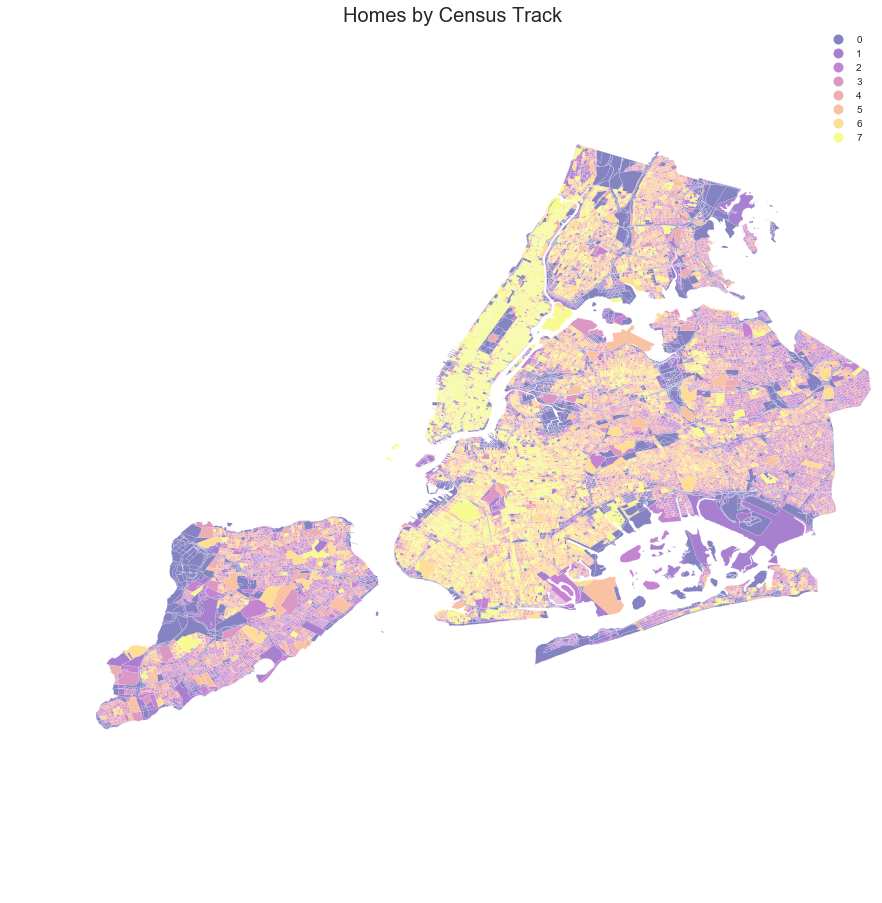

In [51]:
f, ax = pl.subplots(figsize=(15,15))

#parks.plot(c = 'green', linewidth = .5, ax = ax,  colormap = 'Greens', label = 'parks')
blocks.assign(cl = homeaffected.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
                                          ax=ax, cmap='plasma', edgecolor='white', legend=True)

#for i in range(len(facilAsthma)):
#    pl.scatter((getXY(facilAsthma.geometry[i]))[0], (getXY(facilAsthma.geometry[i]))[1], 
#               s = 100, color = 'b', label = 'Facilities')
#pl.xlabel('longitude')
#pl.ylabel('latitude')
pl.axis('off')
#pl.legend()
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("Homes by Census Track", size=20)

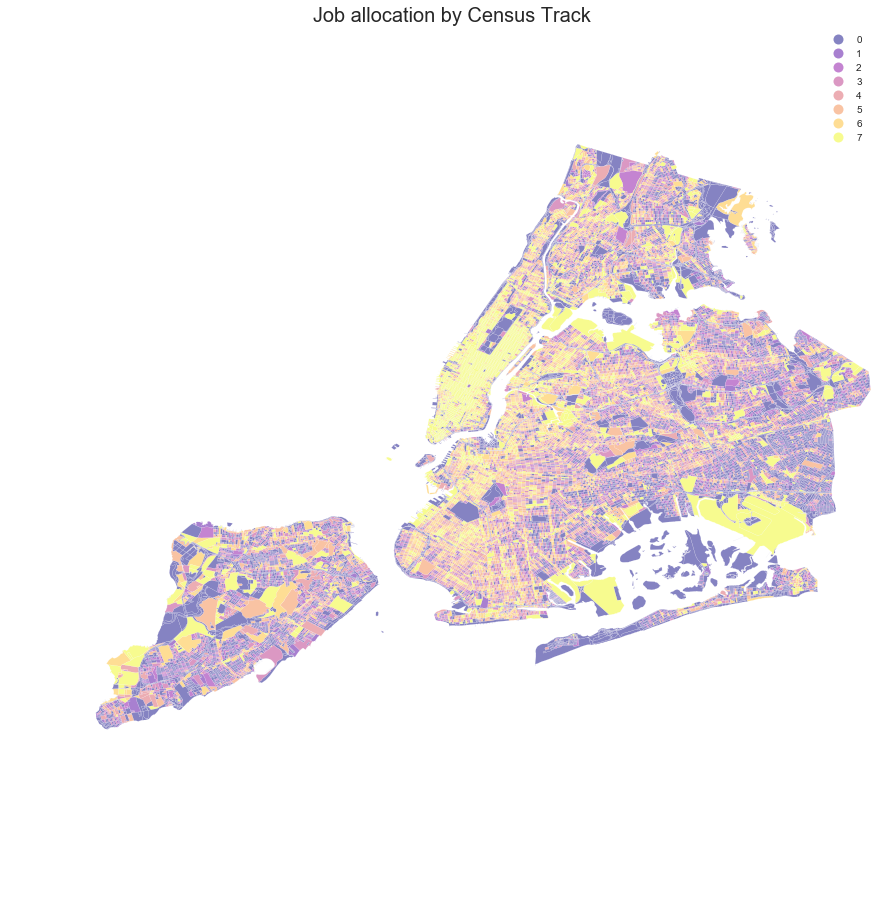

In [52]:
f, ax = pl.subplots(figsize=(15,15))

#parks.plot(c = 'green', linewidth = .5, ax = ax,  colormap = 'Greens', label = 'parks')
blocks.assign(cl = jobaffected.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
                                          ax=ax, cmap='plasma', edgecolor='white', legend=True)

#for i in range(len(facilAsthma)):
#    pl.scatter((getXY(facilAsthma.geometry[i]))[0], (getXY(facilAsthma.geometry[i]))[1], 
#               s = 100, color = 'b', label = 'Facilities')
#pl.xlabel('longitude')
#pl.ylabel('latitude')
pl.axis('off')
#pl.legend()
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("Job allocation by Census Track", size=20)

In [53]:
print 'done'

done
